In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, Bidirectional

2024-03-17 11:30:09.731481: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Завантаження даних

max_features = 10000
maxlen = 500

print('Завантаження даних...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'тренувальних послідовностей')
print(len(x_test), 'тестових послідовностей')

Завантаження даних...
25000 тренувальних послідовностей
25000 тестових послідовностей


In [3]:
# Підготовка даних

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [4]:
# Будуємо та компілюємо моделі

models = []
model_types = ['RNN', 'LSTM', 'Bidirectional', 'Deep']

for model_type in model_types:
    print(f'Побудова та компіляція моделі {model_type}...')
    model = Sequential()
    model.add(Embedding(max_features, 32))
    if model_type == 'RNN':
        model.add(SimpleRNN(32))
    elif model_type == 'LSTM':
        model.add(LSTM(32))
    elif model_type == 'Bidirectional':
        model.add(Bidirectional(LSTM(32)))
    elif model_type == 'Deep':
        model.add(LSTM(32, return_sequences=True))
        model.add(LSTM(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    models.append(model)

Побудова та компіляція моделі RNN...
Побудова та компіляція моделі LSTM...
Побудова та компіляція моделі Bidirectional...
Побудова та компіляція моделі Deep...


In [5]:
# Навчання моделей

batch_size = 128
epochs = 4

history = []

for model in models:
    print(f'Навчання моделі {model.layers[1].name}...')
    h = model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(x_test, y_test))
    history.append(h)

Навчання моделі simple_rnn...
Epoch 1/4
196/196 [==============================] - 33s 162ms/step - loss: 0.5935 - accuracy: 0.6665 - val_loss: 0.4243 - val_accuracy: 0.8212
Epoch 2/4
196/196 [==============================] - 34s 172ms/step - loss: 0.3475 - accuracy: 0.8555 - val_loss: 0.3617 - val_accuracy: 0.8479
Epoch 3/4
196/196 [==============================] - 33s 167ms/step - loss: 0.2294 - accuracy: 0.9151 - val_loss: 0.4297 - val_accuracy: 0.8405
Epoch 4/4
196/196 [==============================] - 35s 177ms/step - loss: 0.1463 - accuracy: 0.9486 - val_loss: 0.3885 - val_accuracy: 0.8423
Навчання моделі lstm...
Epoch 1/4
196/196 [==============================] - 73s 360ms/step - loss: 0.5060 - accuracy: 0.7534 - val_loss: 0.3449 - val_accuracy: 0.8581
Epoch 2/4
196/196 [==============================] - 65s 331ms/step - loss: 0.2634 - accuracy: 0.8973 - val_loss: 0.2998 - val_accuracy: 0.8785
Epoch 3/4
196/196 [==============================] - 65s 332ms/step - loss: 0.1975

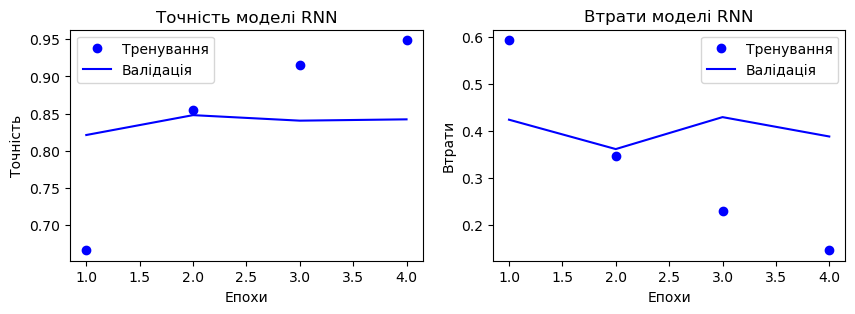

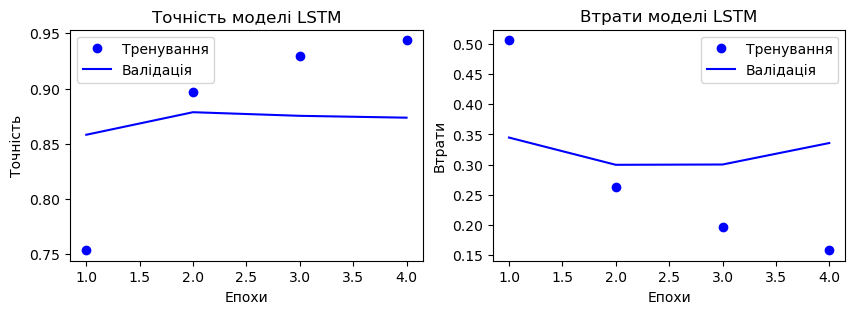

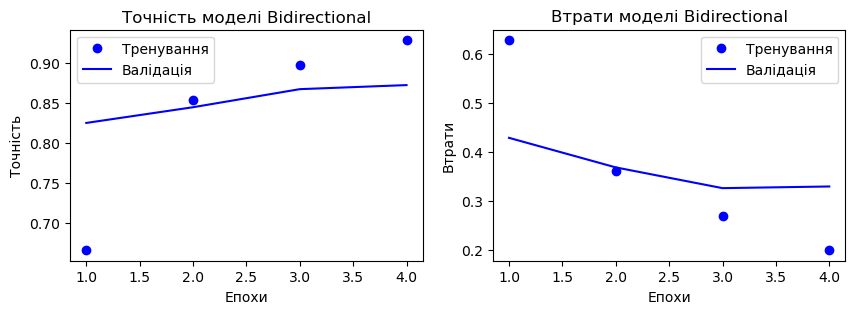

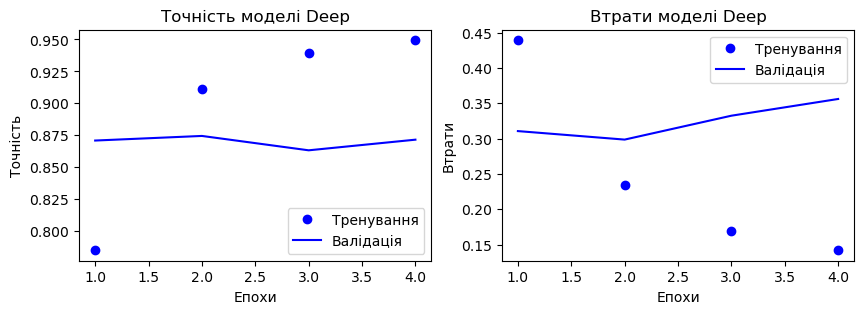

In [6]:
# Відображення результатів

import matplotlib.pyplot as plt

for i, model_type in enumerate(model_types):
    acc = history[i].history['accuracy']
    val_acc = history[i].history['val_accuracy']
    loss = history[i].history['loss']
    val_loss = history[i].history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Тренування')
    plt.plot(epochs, val_acc, 'b', label='Валідація')
    plt.title(f'Точність моделі {model_type}')
    plt.xlabel('Епохи')
    plt.ylabel('Точність')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Тренування')
    plt.plot(epochs, val_loss, 'b', label='Валідація')
    plt.title(f'Втрати моделі {model_type}')
    plt.xlabel('Епохи')
    plt.ylabel('Втрати')
    plt.legend()
    
    plt.show()

## Висновки:

1. SimpleRNN:
    На тренувальному наборі точність збільшилась з кожною епохою, досягнувши приблизно 94.9% на останній епосі.
Точність на валідаційному наборі також збільшилась з кожною епохою, досягнувши близько 84.2% на останній епосі.
Хоча модель здатна досягати високої точності на тренувальному наборі, її ефективність на валідаційному наборі здається меншою, що може свідчити про перенавчання.

2. LSTM:
    Подібно до SimpleRNN, точність збільшувалась з кожною епохою на тренувальному наборі, досягнувши приблизно 94.4% на останній епосі.
На валідаційному наборі також спостерігається збільшення точності з кожною епохою, але до значення близько 87.4% на останній епосі.
LSTM показує кращі результати на валідаційному наборі порівняно з SimpleRNN, що може свідчити про його кращу здатність до уникнення перенавчання.

3. Bidirectional LSTM:
    Точність на тренувальному наборі зростала протягом епох і досягла близько 92.9% на останній епосі.
На валідаційному наборі точність також зростала, досягнувши близько 87.2% на останній епосі.
Bidirectional LSTM демонструє подібну ефективність до звичайного LSTM на валідаційному наборі.

### Враховуючи ці результати, можна зробити наступні висновки:

LSTM та Bidirectional LSTM виявилися ефективнішими за SimpleRNN, особливо на валідаційному наборі.
LSTM та Bidirectional LSTM мають тенденцію до кращого уникнення перенавчання порівняно з SimpleRNN.
Bidirectional LSTM не виявив істотної переваги над звичайним LSTM на цьому конкретному завданні.